## **Importing necessary modules**

In [ ]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 
 from sklearn.model_selection import train_test_split

 import keras
 from keras.models import Sequential
 from keras.layers import Dense, LSTM

<br/>

## **Creating a random dataset with normalization**
Without normalization, it looked liked this:  
**data[:2]** = [[[0], [1], [2], [3], [4]],  
[[1], [2], [3], [4], [5]]]
<br/>

**target[:2]** = [[5],  
[6]]

In [ ]:
data = [[[(i+j)/100] for i in range(5)] for j in range(100)]
target = [[(i+5)/100] for i in range(100)]

In [ ]:
data[:5]

[[[0.0], [0.01], [0.02], [0.03], [0.04]],
 [[0.01], [0.02], [0.03], [0.04], [0.05]],
 [[0.02], [0.03], [0.04], [0.05], [0.06]],
 [[0.03], [0.04], [0.05], [0.06], [0.07]],
 [[0.04], [0.05], [0.06], [0.07], [0.08]]]

In [ ]:
target[:5]

[[0.05], [0.06], [0.07], [0.08], [0.09]]

<br/>

## **Converting them into numpy array**

In [ ]:
data = np.array(data, dtype = float)
target = np.array(target, dtype = float)

<br/>

## **Shape of the array**

In [ ]:
print("Shape of data : {}".format(data.shape))
print("Shape of target : {}".format(target.shape))

Shape of data : (100, 5, 1)
Shape of target : (100, 1)


<br/>

## **Splitting into train and test split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 0)

<br/>
<br/>

## **Model Architecture**
**Note:**  
 **return_sequences = True** - It will return output after avery node  
 **return_sequences = False** - It will return a single output at the last node


In [ ]:
model = Sequential()

# Layers
model.add(LSTM((1), batch_input_shape = (None, 5, 1), return_sequences = False))

# Compile the model
model.compile(loss = 'mean_absolute_error', optimizer = 'adam', metrics = ['accuracy'])

### **Model Summary**

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


## **Training the model**

In [ ]:
history = model.fit(X_train, y_train, epochs = 400, validation_data= (X_test, y_test))

Epoch 1/400
3/3 [==============================] - 0s 165ms/step - loss: 0.4227 - accuracy: 0.0000e+00 - val_loss: 0.3908 - val_accuracy: 0.0000e+00
Epoch 2/400
3/3 [==============================] - 0s 10ms/step - loss: 0.4155 - accuracy: 0.0000e+00 - val_loss: 0.3837 - val_accuracy: 0.0000e+00
Epoch 3/400
3/3 [==============================] - 0s 10ms/step - loss: 0.4080 - accuracy: 0.0000e+00 - val_loss: 0.3766 - val_accuracy: 0.0000e+00
Epoch 4/400
3/3 [==============================] - 0s 12ms/step - loss: 0.4006 - accuracy: 0.0000e+00 - val_loss: 0.3695 - val_accuracy: 0.0000e+00
Epoch 5/400
3/3 [==============================] - 0s 10ms/step - loss: 0.3933 - accuracy: 0.0000e+00 - val_loss: 0.3623 - val_accuracy: 0.0000e+00
Epoch 6/400
3/3 [==============================] - 0s 10ms/step - loss: 0.3856 - accuracy: 0.0000e+00 - val_loss: 0.3551 - val_accuracy: 0.0000e+00
Epoch 7/400
3/3 [==============================] - 0s 9ms/step - loss: 0.3783 - accuracy: 0.0000e+00 - val_loss

## **Prediction**

In [ ]:
y_pred = model.predict(X_test)

<br/>

## **Scatter plot with some actual and predicted value**

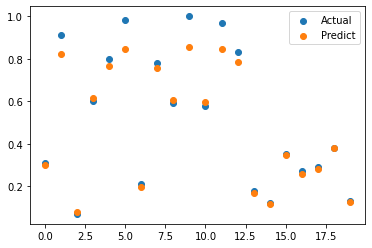

In [ ]:
plt.scatter(range(20), y_test, label = 'Actual')
plt.scatter(range(20), y_pred, label = 'Predict')

plt.legend()
plt.show()

<br/>

## **LOss vs EPochs
As the losses are getting decreased, there's still a chance to improve the model

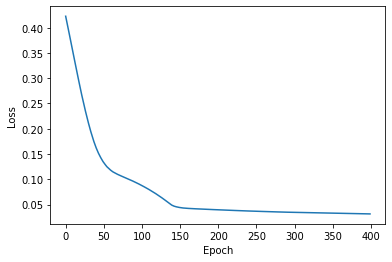

In [ ]:
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

<br/>
<br/>

## **Adding more layers**
<br/>

**Note:**  
Here, the **return_sequences** will be **True** for the 1st layer. Because we need the output after every node as they will be the output of the second layer.  
Then the **return_sequences** of the second as well as last layer will be **False** as usual.

In [ ]:
model1 = Sequential()

model1.add(LSTM((1), batch_input_shape = (None, 5, 1), return_sequences = True))
model1.add(LSTM((1), return_sequences = False))

In [ ]:
model1.compile(loss = 'mean_absolute_error', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 5, 1)              12        
_________________________________________________________________
lstm_3 (LSTM)                (None, 1)                 12        
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history1 = model1.fit(X_train, y_train, epochs = 400, validation_data = (X_test, y_test))

Epoch 1/400
3/3 [==============================] - 1s 310ms/step - loss: 0.5620 - accuracy: 0.0000e+00 - val_loss: 0.5238 - val_accuracy: 0.0000e+00
Epoch 2/400
3/3 [==============================] - 0s 12ms/step - loss: 0.5578 - accuracy: 0.0000e+00 - val_loss: 0.5197 - val_accuracy: 0.0000e+00
Epoch 3/400
3/3 [==============================] - 0s 10ms/step - loss: 0.5537 - accuracy: 0.0000e+00 - val_loss: 0.5157 - val_accuracy: 0.0000e+00
Epoch 4/400
3/3 [==============================] - 0s 10ms/step - loss: 0.5496 - accuracy: 0.0000e+00 - val_loss: 0.5117 - val_accuracy: 0.0000e+00
Epoch 5/400
3/3 [==============================] - 0s 10ms/step - loss: 0.5456 - accuracy: 0.0000e+00 - val_loss: 0.5077 - val_accuracy: 0.0000e+00
Epoch 6/400
3/3 [==============================] - 0s 10ms/step - loss: 0.5415 - accuracy: 0.0000e+00 - val_loss: 0.5037 - val_accuracy: 0.0000e+00
Epoch 7/400
3/3 [==============================] - 0s 10ms/step - loss: 0.5375 - accuracy: 0.0000e+00 - val_los

<br/>

## **Prediction**

In [ ]:
y1_pred = model1.predict(X_test)

<br/>

## **Scatter plot with some actual and predicted value**

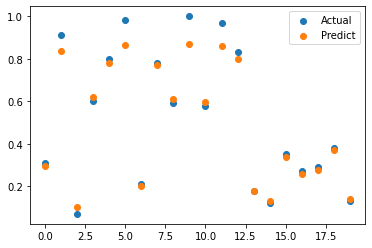

In [ ]:
plt.scatter(range(20), y_test, label = 'Actual')
plt.scatter(range(20), y1_pred, label = 'Predict')

plt.legend()
plt.show()

<br/>

## **Loss vs Epochs**

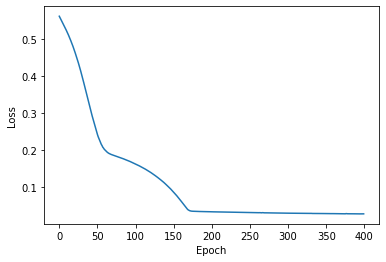

In [ ]:
plt.plot(history1.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

<br/>

## **CONCLUSION**  
From the second 'loss vs Epochs' graph, we are seeing that the loss is stopped to decrease and the accuracy of the model compare to the previous one increases.